# Averaged Prediction over entire cohort

In [1]:
import pandas as pd
from utils.data_loader import load_data
pd.options.mode.chained_assignment = None

df, config, features = load_data()

Shape of SHAP values: (4219, 10, 3)
Mean SHAP values for class ALL:
Fibrinogen_g_L: -0.04964924976229668
MCV_fL: -0.10504671186208725
Monocytes_percent: -0.22741980850696564
LDH_UI_L: -0.045035041868686676
PT_percent: -0.170333132147789
MCHC_g_L: 0.05120186507701874
Lymphocytes_G_L: 0.011308728717267513
age: -0.0033422631677240133
Monocytes_G_L: -0.08022631704807281
Platelets_G_L: -0.04130128026008606
Mean SHAP values for class AML:
Fibrinogen_g_L: 0.0330665297806263
MCV_fL: 0.13278943300247192
Monocytes_percent: 0.24733516573905945
LDH_UI_L: 0.02277909219264984
PT_percent: 0.01058979332447052
MCHC_g_L: -0.028696872293949127
Lymphocytes_G_L: -0.016321592032909393
age: -0.04050688073039055
Monocytes_G_L: 0.15491467714309692
Platelets_G_L: -0.0018191196722909808
Mean SHAP values for class APL:
Fibrinogen_g_L: -0.45242172479629517
MCV_fL: 0.010042090900242329
Monocytes_percent: -0.02844204567372799
LDH_UI_L: 0.02974018268287182
PT_percent: -0.03933756798505783
MCHC_g_L: -0.150752484798431

Summary plot for class ALL:


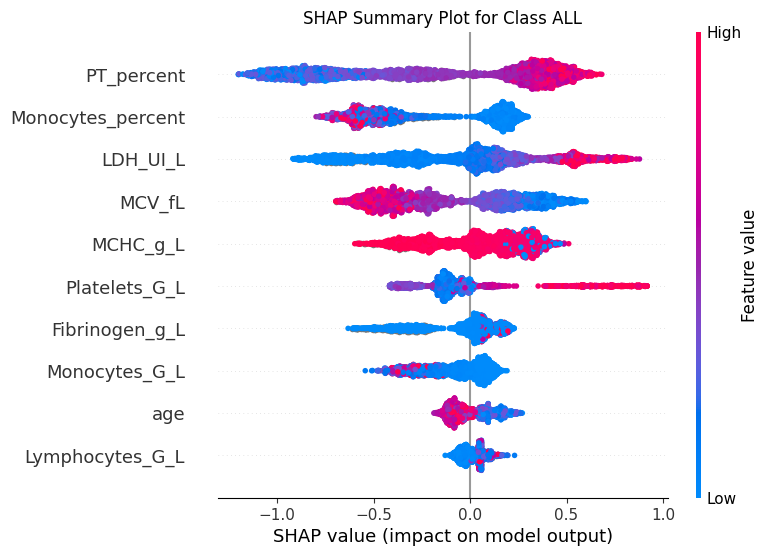

Summary plot for class AML:


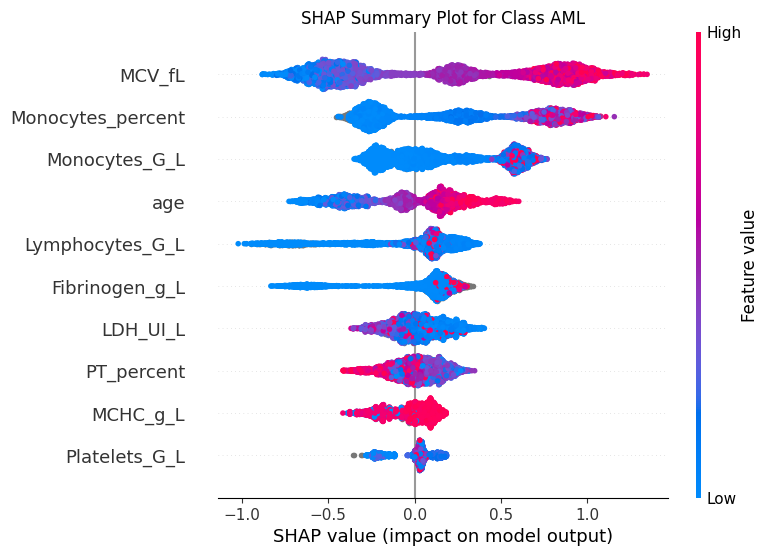

Summary plot for class APL:


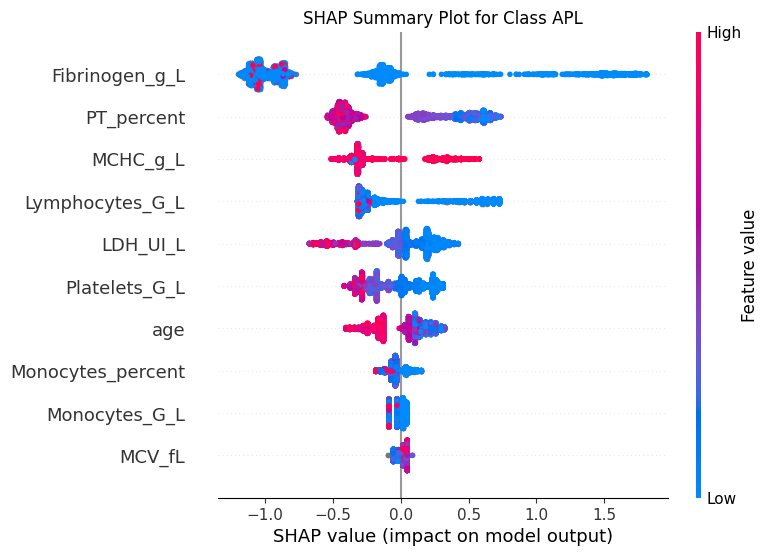

In [2]:
import xgboost as xgb
import shap
import numpy as np
import matplotlib.pyplot as plt


# Load the XGBoost model
model = xgb.Booster(model_file='model.json')

# Calculate Monocytes_percent for each row in the DataFrame
df['mono_percent'] = (df['Monocytes_G_L'] * 100) / df['WBC_G_L']

data_for_prediction = df[features]
dtest = xgb.DMatrix(data_for_prediction)
predictions = model.predict(dtest)

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(dtest)
print("Shape of SHAP values:", np.shape(shap_values))

# Aggregate SHAP values by taking the mean over all samples for each class
mean_shap_values = np.mean(shap_values, axis=0)
class_name = {0: 'ALL', 1: 'AML', 2: 'APL'}

# Print the mean SHAP values for each feature by class
for class_index in range(mean_shap_values.shape[1]):
    print(f"Mean SHAP values for class {class_name[class_index]}:")
    for feature_index, feature_name in enumerate(features):
        print(f"{feature_name}: {mean_shap_values[feature_index, class_index]}")

# Init the JavaScript visualization library
shap.initjs()

# Generate summary plots for each class
for class_index in range(mean_shap_values.shape[1]):
    print(f"Summary plot for class {class_name[class_index]}:")
    shap.summary_plot(shap_values[:, :, class_index], data_for_prediction, show=False)
    plt.title(f"SHAP Summary Plot for Class {class_name[class_index]}")
    plt.show()